In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sqlite3 as sq
import csv


In [5]:
con=sq.connect("sales.db")
cur=con.cursor()


In [9]:

#create table
query="""create table if not exists sales(
         sid INTEGER PRIMARY KEY,
        year INTEGER NOT NULL,
        totalsales REAL NOT NULL
        )"""

In [10]:
cur.execute(query)

In [11]:

# Insert sample records into the Sales table
sales_data = [
    (1, 2022, 10000.0),
    (2, 2022, 12000.0),
    (3, 2022, 15000.0),
    (4, 2023, 11000.0),
    (5, 2023, 13000.0),
    # Add more records as needed
]


In [13]:
cur.executemany('INSERT INTO sales (sid, year, totalsales) VALUES (?, ?, ?)', sales_data)


In [18]:

# Reopen the database connection

cur.execute('SELECT * FROM Sales')
sales_data = cur.fetchall()

with open('sales.csv', 'w', newline='') as csvfile:
    csv_writer = csv.writer(csvfile)
    # Write the header
    csv_writer.writerow(['sid', 'year', 'totalsales'])
    # Write the data
    csv_writer.writerows(sales_data)

# Close the connection
con.close()


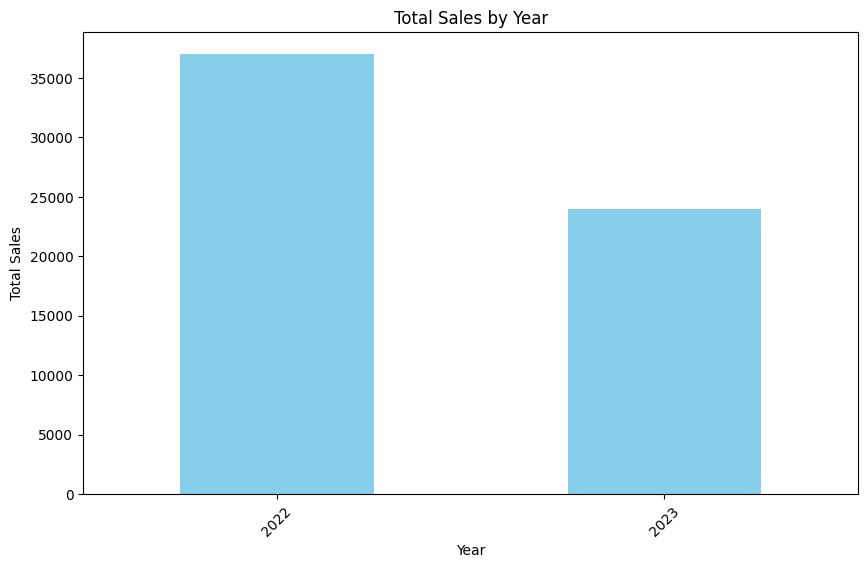

In [20]:
df = pd.read_csv('sales.csv')

yearly_sales = df.groupby('year')['totalsales'].sum()

plt.figure(figsize=(10, 6))
yearly_sales.plot(kind='bar', color='skyblue')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.title('Total Sales by Year')
plt.xticks(rotation=45)
# Show the plot
plt.show()